NBA Performance Insights (2021)
Author: Delery Harrison https://github.com/Delery5  
GitHub Page: https://github.com/Delery5/Delery5.github.io
This project analyzes NBA player statistics for the 2021 season using the player gamelogs dataset.


Project Description
This project aims to analyze the performance of NBA players during the 2021 season.
We will extract and clean data from the player gamelogs dataset and conduct exploratory data  analysis (EDA) to uncover insights about player performance.


Data Sources
- [Kaggle - NBA Performance Insights (2017-2020)](https://www.kaggle.com/datasets/nathanlauga/nba-performance-insights-20172020)
- [player_gamelogs_2021.csv](data/player_gamelogs_2021.csv)


Project Goals
  - Load and clean the player gamelogs dataset for the 2021 season.
  - Perform exploratory data analysis to identify trends in player performance.
  - Visualize key statistics and insights using appropriate plots.


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/player_gamelogs_2021.csv')

# Display the first few rows and check data types
print(data.head())
print(data.info())


   Unnamed: 0 SEASON_YEAR  PLAYER_ID      PLAYER_NAME NICKNAME     TEAM_ID  \
0           0     2020-21    1628420     Monte Morris    Monte  1610612743   
1           1     2020-21    1629630        Ja Morant       Ja  1610612763   
2           2     2020-21     204456   T.J. McConnell     T.J.  1610612754   
3           3     2020-21    1629130  Duncan Robinson   Duncan  1610612748   
4           4     2020-21     101150     Lou Williams      Lou  1610612737   

  TEAM_ABBREVIATION          TEAM_NAME   GAME_ID            GAME_DATE  ...  \
0               DEN     Denver Nuggets  22001076  2021-05-16T00:00:00  ...   
1               MEM  Memphis Grizzlies  22001070  2021-05-16T00:00:00  ...   
2               IND     Indiana Pacers  22001079  2021-05-16T00:00:00  ...   
3               MIA         Miami Heat  22001069  2021-05-16T00:00:00  ...   
4               ATL      Atlanta Hawks  22001066  2021-05-16T00:00:00  ...   

  BLK_RANK BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_

In [2]:
# Check for missing values and handle them
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Check for duplicates
data = data.drop_duplicates()


Unnamed: 0              0
SEASON_YEAR             0
PLAYER_ID               0
PLAYER_NAME             0
NICKNAME                0
                       ..
PLUS_MINUS_RANK         0
NBA_FANTASY_PTS_RANK    0
DD2_RANK                0
TD3_RANK                0
VIDEO_AVAILABLE_FLAG    0
Length: 67, dtype: int64


Top 5 Scorers:
 PLAYER_NAME
Stephen Curry            31.984127
Bradley Beal             31.300000
Damian Lillard           28.776119
Joel Embiid              28.450980
Giannis Antetokounmpo    28.147541
Name: PTS, dtype: float64


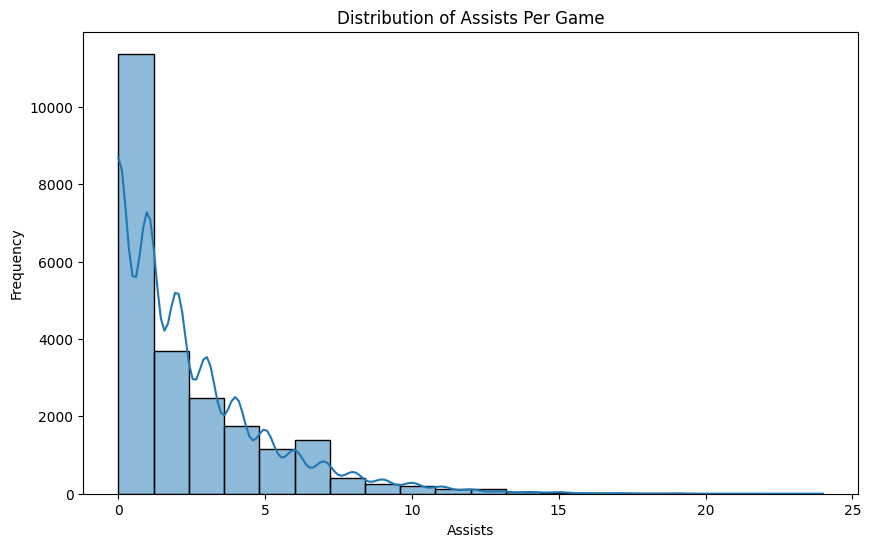

In [3]:
# Top 5 scorers
top_scorers = data.groupby('PLAYER_NAME')['PTS'].mean().nlargest(5)
print("Top 5 Scorers:\n", top_scorers)

# Distribution of assists
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['AST'], bins=20, kde=True)
plt.title('Distribution of Assists Per Game')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()


 Summary of Findings
 1. The top scorers in the 2021 season demonstrated significant average points per game.
 2. The distribution of assists showed interesting patterns, indicating trends in playmaking efficiency among players.
 3. Further exploration could include comparisons with previous seasons or other statistical measures.


In [4]:
# Drop unnecessary columns, like 'Unnamed: 0', and parse date column
data = data.drop(columns=['Unnamed: 0'])
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE']).dt.date  # Extract date only

# Re-check dataset info
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23054 entries, 0 to 23053
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON_YEAR           23054 non-null  object 
 1   PLAYER_ID             23054 non-null  int64  
 2   PLAYER_NAME           23054 non-null  object 
 3   NICKNAME              23054 non-null  object 
 4   TEAM_ID               23054 non-null  int64  
 5   TEAM_ABBREVIATION     23054 non-null  object 
 6   TEAM_NAME             23054 non-null  object 
 7   GAME_ID               23054 non-null  int64  
 8   GAME_DATE             23054 non-null  object 
 9   MATCHUP               23054 non-null  object 
 10  WL                    23054 non-null  object 
 11  MIN                   23054 non-null  float64
 12  FGM                   23054 non-null  int64  
 13  FGA                   23054 non-null  int64  
 14  FG_PCT                23054 non-null  float64
 15  FG3M               

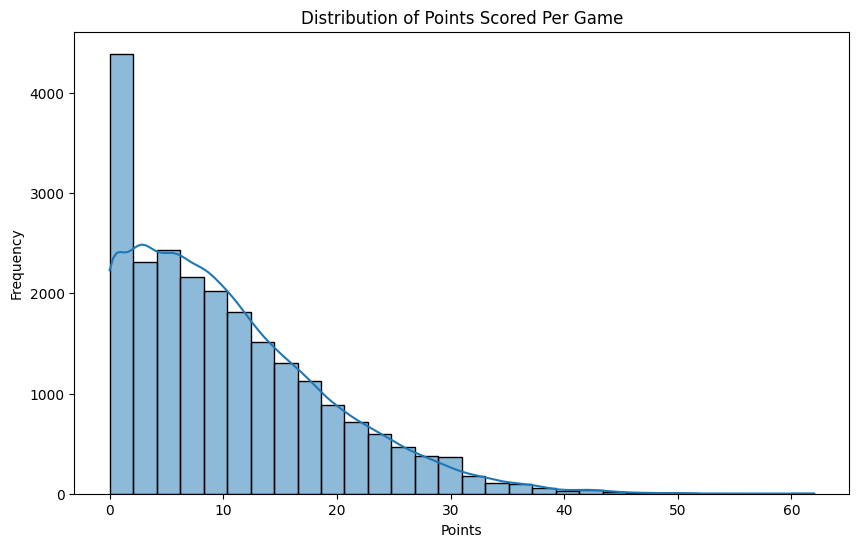

In [5]:
# Plot the distribution of points scored per game
plt.figure(figsize=(10, 6))
sns.histplot(data['PTS'], bins=30, kde=True)
plt.title('Distribution of Points Scored Per Game')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()


Average Points per Team:
 TEAM_NAME
Brooklyn Nets             11.443700
Portland Trail Blazers    11.282051
New Orleans Pelicans      11.210598
Houston Rockets           11.190000
Indiana Pacers            11.158602
Sacramento Kings          11.126359
Milwaukee Bucks           10.948101
Charlotte Hornets         10.795890
Toronto Raptors           10.709893
Atlanta Hawks             10.617380
Memphis Grizzlies         10.552393
Miami Heat                10.543360
Golden State Warriors     10.536680
Washington Wizards        10.484395
Phoenix Suns              10.453401
Minnesota Timberwolves    10.430233
Orlando Magic             10.328276
Chicago Bulls             10.322539
Oklahoma City Thunder     10.285714
LA Clippers               10.222914
Utah Jazz                 10.221951
Cleveland Cavaliers       10.185286
New York Knicks           10.166227
Denver Nuggets            10.164417
Boston Celtics            10.161654
Dallas Mavericks          10.132666
San Antonio Spurs         10

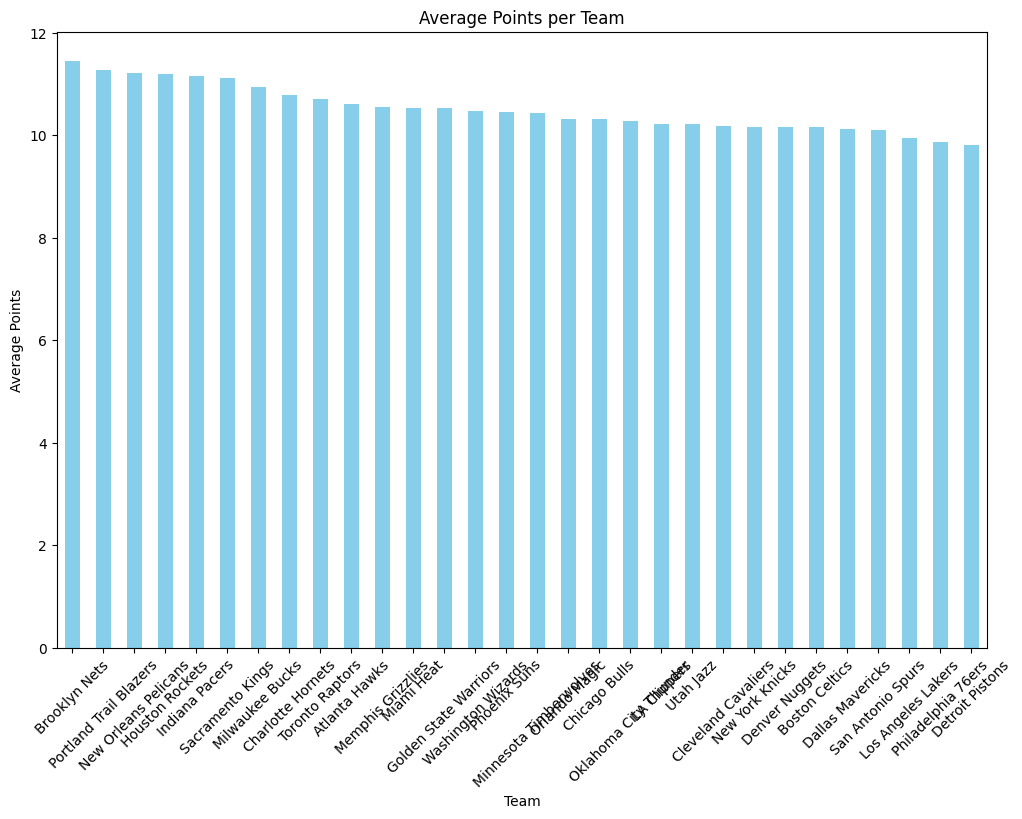

In [6]:
# Average points by team
team_points = data.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False)
print("Average Points per Team:\n", team_points)

# Plotting
plt.figure(figsize=(12, 8))
team_points.plot(kind='bar', color='skyblue')
plt.title('Average Points per Team')
plt.xlabel('Team')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.show()


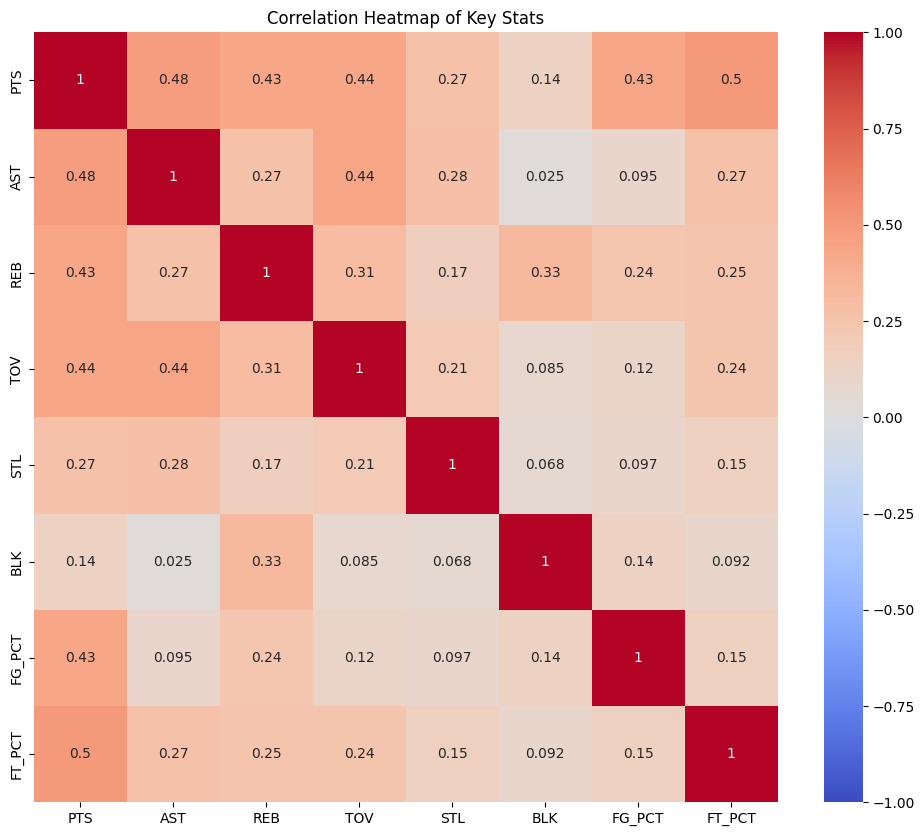

In [7]:
# Calculate correlations and plot heatmap
plt.figure(figsize=(12, 10))
corr = data[['PTS', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'FG_PCT', 'FT_PCT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Stats')
plt.show()


In [8]:
# Top 5 players by average rebounds
top_rebounders = data.groupby('PLAYER_NAME')['REB'].mean().nlargest(5)
print("Top 5 Rebounders:\n", top_rebounders)


Top 5 Rebounders:
 PLAYER_NAME
Clint Capela         14.333333
Rudy Gobert          13.521127
Jonas Valanciunas    12.516129
Andre Drummond       11.978261
Domantas Sabonis     11.967742
Name: REB, dtype: float64


In [9]:
# Filter games where players achieved triple-doubles
triple_doubles = data[(data['PTS'] >= 10) & (data['REB'] >= 10) & (data['AST'] >= 10)]
triple_double_counts = triple_doubles['PLAYER_NAME'].value_counts().head(5)
print("Top 5 Players with Most Triple-Doubles:\n", triple_double_counts)


Top 5 Players with Most Triple-Doubles:
 PLAYER_NAME
Russell Westbrook    38
Nikola Jokic         16
James Harden         12
Luka Doncic          11
Domantas Sabonis      9
Name: count, dtype: int64


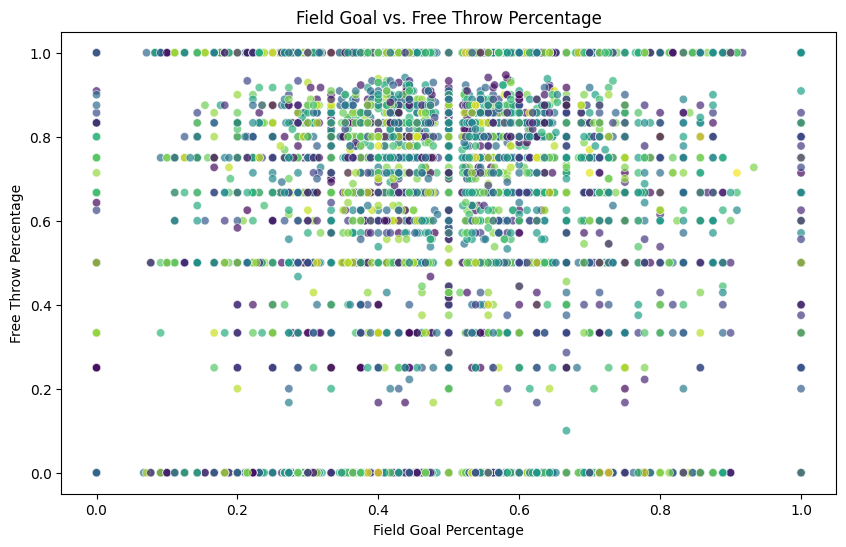

In [10]:
# Scatter plot for FG_PCT and FT_PCT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FG_PCT', y='FT_PCT', data=data, hue='PLAYER_NAME', palette='viridis', alpha=0.7)
plt.title('Field Goal vs. Free Throw Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Free Throw Percentage')
plt.legend([],[], frameon=False) 
plt.show()
